In [1]:
import pandas as pd
data = pd.read_csv(r'D:\Ongoing\5-6_gasification\dry-gasification\Gasification_syngas.csv',encoding= 'unicode_escape')
print(data)

     S (%)  O (%)  C (%)  H (%)  N (%)  Ash (%)  T (oC)   S/B    ER  \
0     1.60  18.20  29.50   4.90   4.10    41.70     800  0.00  0.30   
1     1.60  18.20  29.50   4.90   4.10    41.70     800  0.00  0.30   
2     1.60  18.20  29.50   4.90   4.10    41.70     800  0.00  0.30   
3     1.60  18.20  29.50   4.90   4.10    41.70     800  1.00  0.30   
4     1.60  18.20  29.50   4.90   4.10    41.70     800  1.00  0.30   
..     ...    ...    ...    ...    ...      ...     ...   ...   ...   
337   0.75  23.75  45.60   4.90   5.20    19.80     800  1.30  0.31   
338   1.04  26.62  43.07   5.78   5.34    18.15     606  0.00  0.00   
339   1.04  26.62  43.07   5.78   5.34    18.15     656  0.00  0.00   
340   0.81  35.12  38.56   5.16   3.94    16.41     900  1.24  0.00   
341   0.81  35.22  38.58   5.13   3.94    16.32     800  0.00  0.00   

     H2 (mol/kg )  ...  CO2 (mol/kg)  CO (mol/kg )  HHV (kJ/mol)    SUM  \
0            7.48  ...          9.99          5.98    225.942596  25.66 

In [4]:
X=data.values[:,:9]
y=data.values[:,9:13]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
mm_X = StandardScaler()
mm_y = StandardScaler()
X=mm_X.fit_transform(X)
y=mm_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [5]:
"""hyper-paramter tuning of GBR """
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

x =np.arange(1,80,5)
y =np.arange(3,20,2)

                                  
for i in x:
    for j in y:
        model =MultiOutputRegressor(GradientBoostingRegressor(n_estimators=i,max_depth=j, random_state=42))#,learning_rate=0.6,subsample=0.1
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')#scoring='neg_mean_squared_error'

        Scores1=-np.mean(scores)
        Scores2=Scores1**1/2
        std=np.std(scores)      
        print(i,j,Scores2,std)

1 3 0.4746459278886198 0.19479292545861943
1 5 0.4590867066704284 0.19302364760881346
1 7 0.4499761375991998 0.18755411812499426
1 9 0.44578149572958436 0.18656539383542167
1 11 0.4457583177826291 0.18559551557850573
1 13 0.4452116012783325 0.18720474464505396
1 15 0.44533309108161473 0.18696036408096628
1 17 0.4452288262062618 0.18682100503718382
1 19 0.4452419025149451 0.1868169486666289
6 3 0.3226133057007603 0.17123023876427043
6 5 0.27528432259936064 0.14457604735101323
6 7 0.25118044149584656 0.13287317142932178
6 9 0.24159774628049782 0.13580864530362405
6 11 0.23971845567806382 0.12860560705843724
6 13 0.24000261861404856 0.1343941106265613
6 15 0.23963689685474562 0.1337744825771714
6 17 0.2397330901036186 0.13518090618865708
6 19 0.23960252745999408 0.13537259796764184
11 3 0.25308700271213136 0.1477009841666785
11 5 0.20939305611006004 0.1275958340784049
11 7 0.19223488376471537 0.11974307614670487
11 9 0.18695322199422065 0.12473841985846795
11 11 0.185890301473501 0.118221

In [6]:
x=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y=[0.01,0.05,0.1,1]

for i in x:
    for j in y:

        model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=31,max_depth=6, learning_rate=j,subsample=i,random_state=42))
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')#scoring='neg_mean_squared_error'

        Scores1=-np.mean(scores)
        Scores2=Scores1**1/2
        std=np.std(scores)       
        print(i,j,Scores2,std)
       

0.2 0.01 0.3843946397708427 0.1805249698854439
0.2 0.05 0.19955235268896931 0.11274131619498927
0.2 0.1 0.1716822366252577 0.0920505140625339
0.2 1 1.7174192412592828 1.5676904193679475
0.3 0.01 0.3703673683878822 0.17502707991978325
0.3 0.05 0.17724015061727877 0.10757538060038074
0.3 0.1 0.15971671178961652 0.09717164845247649
0.3 1 0.7288222942594933 0.6168078793029298
0.4 0.01 0.3615845549889937 0.16408537461378528
0.4 0.05 0.1716353683128084 0.09362729695333472
0.4 0.1 0.1608920096745161 0.096998451587444
0.4 1 0.408510549669186 0.12896243323323883
0.5 0.01 0.3557264700400855 0.16231408173786224
0.5 0.05 0.17089493521073593 0.10258555419334844
0.5 0.1 0.1630490232666693 0.11023039370444805
0.5 1 0.4027223194906607 0.4361840624312806
0.6 0.01 0.35352155473665847 0.1609603233217773
0.6 0.05 0.17507618919060058 0.10744891368933256
0.6 0.1 0.17208636851754816 0.1258404095724149
0.6 1 0.3053994227337774 0.19232817652607995
0.7 0.01 0.3521859893669215 0.16192110553291553
0.7 0.05 0.1761

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np

X=data.values[:,:9]
y=data.values[:,9:13]
mm_X = StandardScaler()
mm_y = StandardScaler()
X=mm_X.fit_transform(X)
y=mm_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

"""models with optimal hyper-parameters"""
model=MultiOutputRegressor(GradientBoostingRegressor(learning_rate=0.1, subsample=0.4,random_state=42,
                                                          n_estimators=31,max_depth=6))

"""model retrain and test"""

model.fit(X_train,y_train)

y_train_pre=model.predict(X_train)
y_test_pre=model.predict(X_test)

y_train_pre = mm_y.inverse_transform(y_train_pre)
y_test_pre = mm_y.inverse_transform(y_test_pre)

y_train = mm_y.inverse_transform(y_train)
y_test = mm_y.inverse_transform(y_test)


from sklearn.metrics import mean_squared_error, r2_score

train_R2=r2_score(y_train, y_train_pre,multioutput='raw_values')
test_R2=r2_score(y_test,y_test_pre,multioutput='raw_values')

train_MSE=mean_squared_error(y_train, y_train_pre,multioutput='raw_values')

train_RMSE=train_MSE**0.5
test_MSE=mean_squared_error(y_test, y_test_pre,multioutput='raw_values')
test_RMSE=test_MSE**0.5

print('train R2',np.around(train_R2,2),'test R2:',np.around(test_R2,2),
      'train RMSE:',np.around(train_RMSE,2), 'test RMSE:',np.around(test_RMSE,2),
     "mean train R2",np.mean(train_R2),"mean train RMSE",np.mean(train_RMSE),
     "mean test R2",np.mean(test_R2),"mean test RMSE",np.mean(test_RMSE))

train R2 [0.93 0.86 0.95 0.89] test R2: [0.85 0.85 0.82 0.83] train RMSE: [3.97 0.47 3.51 1.85] test RMSE: [6.17 0.47 3.58 2.13] mean train R2 0.908 mean train RMSE 2.4492739748086754 mean test R2 0.8366771620367757 mean test RMSE 3.0890464952542267


In [9]:
"""model prediction after the optimal values of inputs values were idenfied based on ML-based process interpretation"""
x_S =np.arange(1,1.5,0.2)
#x_O =np.arange(1,80,5)
x_C =np.arange(48,62,4)
x_H =np.arange(4,5,0.3)
x_N =np.arange(0,0.5,0.2)
x_ash =np.arange(1,5,2)
x_T =np.arange(800,1000,50)
x_SB =np.arange(2.7,3,0.1)
x_ER =np.arange(0,0.1,0.05)

S=[]
O=[]
C=[]
H=[]
N=[]
ash=[]
T=[]
SB=[]
ER=[]


for x0 in x_S:
    for x2 in x_C:
        for x3 in x_H:
            for x4 in x_N:
                for x5 in x_ash:
                    for x6 in x_T:
                        for x7 in x_SB:
                            for x8 in x_ER:
                                x1=100-x0-x2-x3-x4-x5
                                S.append(x0)
                                O.append(x1)
                                C.append(x2)
                                H.append(x3)
                                N.append(x4)
                                ash.append(x5)
                                T.append(x6)
                                SB.append(x7)
                                ER.append(x8)

S=pd.DataFrame(S)
O=pd.DataFrame(O)
C=pd.DataFrame(C)
H=pd.DataFrame(H)
N=pd.DataFrame(N)
ash=pd.DataFrame(ash)
T=pd.DataFrame(T)
SB=pd.DataFrame(SB)
ER=pd.DataFrame(ER)

xdata_generate=pd.concat([S,O,C,H,N,ash,T,SB,ER],axis=1)
print(xdata_generate)
             
ysyngas_pre=model.predict(xdata_generate)
ysyngas_pre = mm_y.inverse_transform(ysyngas_pre)
print(ysyngas_pre)
#np.savetxt('ysyngas_pre.csv',ysyngas_pre, delimiter = ',')


        0     0   0    0    0  0    0    0     0
0     1.0  46.0  48  4.0  0.0  1  800  2.7  0.00
1     1.0  46.0  48  4.0  0.0  1  800  2.7  0.05
2     1.0  46.0  48  4.0  0.0  1  800  2.8  0.00
3     1.0  46.0  48  4.0  0.0  1  800  2.8  0.05
4     1.0  46.0  48  4.0  0.0  1  800  2.9  0.00
...   ...   ...  ..  ...  ... ..  ...  ...   ...
6907  1.4  30.3  60  4.9  0.4  3  950  2.7  0.05
6908  1.4  30.3  60  4.9  0.4  3  950  2.8  0.00
6909  1.4  30.3  60  4.9  0.4  3  950  2.8  0.05
6910  1.4  30.3  60  4.9  0.4  3  950  2.9  0.00
6911  1.4  30.3  60  4.9  0.4  3  950  2.9  0.05

[6912 rows x 9 columns]
[[44.33928617  3.2285227  43.75001534 18.25399669]
 [44.33928617  3.2285227  46.4875863  18.25399669]
 [44.33928617  3.2285227  43.75001534 18.25399669]
 ...
 [44.33928617  3.28995612 30.96633788 18.3619797 ]
 [44.33928617  3.28995612 30.96633788 18.3619797 ]
 [44.33928617  3.28995612 30.96633788 18.3619797 ]]


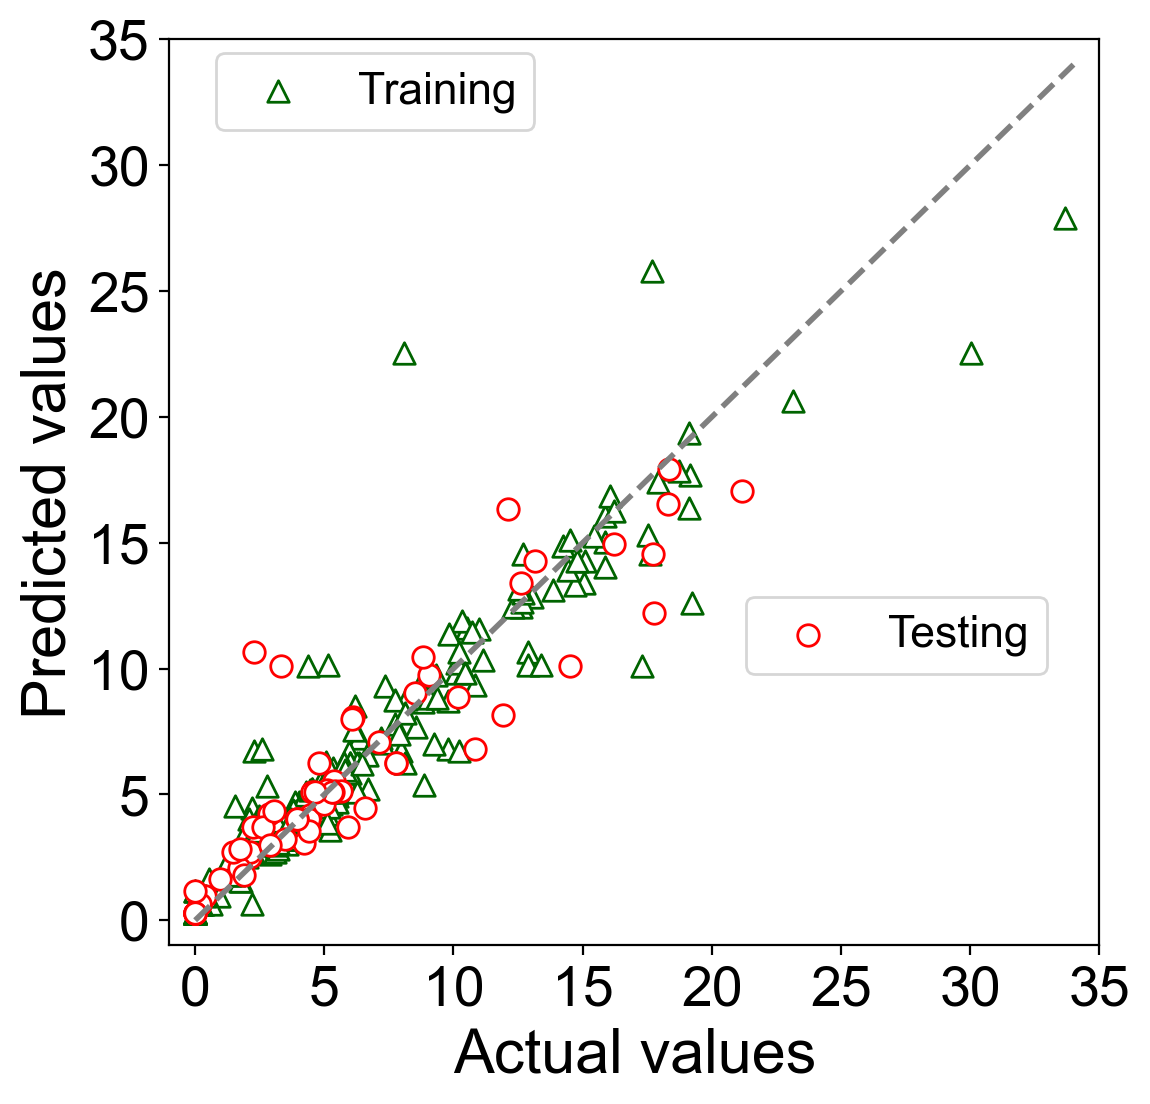

In [57]:
"""predictiion plot"""

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6),dpi=200)#,facecolor="0.92")

p1=plt.scatter(y_train[:,3], y_train_pre[:,3], label='Training',s=60,marker='^',color='w',edgecolors='darkgreen')
p2=plt.scatter(y_test[:,3],y_test_pre[:,3],label='Testing',marker='o',s=60,color='w',edgecolors='red')
plt.xlabel('Actual values', fontsize=22,weight='normal') 
plt.ylabel('Predicted values', fontsize=22,weight='normal') 
plt.xticks(fontsize=20,weight='normal')
plt.yticks(fontsize=20,weight='normal')
m1=plt.legend(handles=[p1],fontsize=16,loc=(0.05,0.9),frameon=True)
x = np.linspace(0,34)
y = x
plt.plot(x, y, color='gray', linewidth=2, linestyle='--')   # linewidth 设置线的宽度， linesyyle设置线的形状
plt.ylim(-1,35)
plt.xlim(-1,35)
ax = plt.gca().add_artist(m1)

m2=plt.legend(handles=[p2],fontsize=16,loc=(0.62,0.3),frameon=True)

plt.show()
plt.rc('font',family='Arial',weight='normal')#,weight='bold'

In [32]:
"""train single task GBR model to get the feature importance and correlations for each target one by one"""
X=data.values[:,:9]
y=data.values[:,12].reshape(342,1)


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
regr_rf=GradientBoostingRegressor(learning_rate=0.1, subsample=0.4,random_state=42,
                                                          n_estimators=31,max_depth=6)

regr_rf.fit(X_train,y_train)

y_train_pre=regr_rf.predict(X_train)
y_test_pre=regr_rf.predict(X_test)


r=r2_score(y_train, y_train_pre,multioutput='raw_values')
r2=r2_score(y_test, y_test_pre,multioutput='raw_values')

train_MSE=mean_squared_error(y_train, y_train_pre,multioutput='raw_values')

train_RMSE=train_MSE**0.5
MSE=mean_squared_error(y_test, y_test_pre,multioutput='raw_values')
RMSE=MSE**0.5

print('train R2',np.around(r,2),'test R2:',np.around(r2,2),
      'train RMSE:',np.around(train_RMSE,2), 'test RMSE:',np.around(RMSE,2),)

train R2 [0.89] test R2: [0.83] train RMSE: [1.84] test RMSE: [2.13]


C:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature ranking:
1. feature 3 (0.300767)
2. feature 5 (0.133106)
3. feature 0 (0.131159)
4. feature 6 (0.130203)
5. feature 4 (0.081449)
6. feature 8 (0.076219)
7. feature 1 (0.068921)
8. feature 2 (0.059298)
9. feature 7 (0.018878)


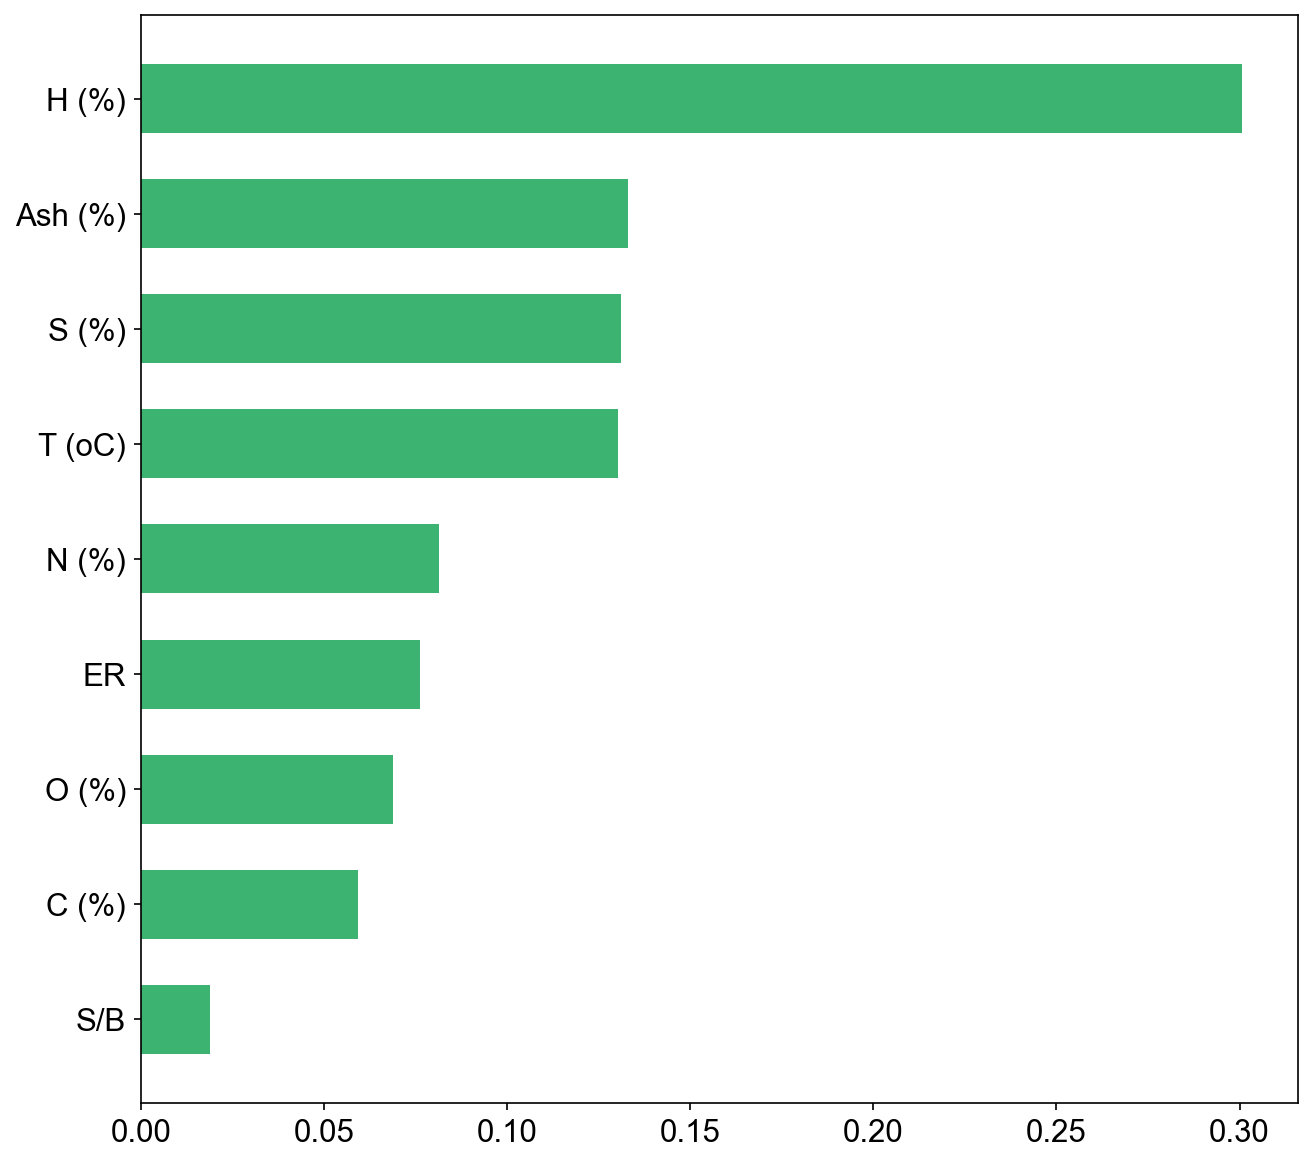

In [33]:
"""feature importance plot""""

import matplotlib as mpl
from cycler import cycler
import matplotlib.pyplot as plt
mpl.rcParams.update({'font.size': 15, 'font.family': 'Arial', 'mathtext.fontset': 'stix',"figure.dpi":150 })
mpl.rcParams['axes.prop_cycle'] = cycler(color=[ 'mediumseagreen', 'b', 'y','r'])

importances = regr_rf.feature_importances_
indices = np.argsort(importances)[::-1]
#Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
   print("%d. feature %d (%f)" % (f + 1, indices[f],importances[indices[f]]))
# Plot the feature importances
fig, ax = plt.subplots(figsize=(9, 8))
y_ticks = np.arange(len(data.columns.values[:9]))
ax.barh(y_ticks,importances[indices],height=0.6)
ax.set_yticklabels(data.columns[indices])
ax.set_yticks(y_ticks)
ax.invert_yaxis()

label_x = ax.get_xticklabels()
# plt.tick_params(axis='x',labelsize=13) 
# plt.tick_params(axis='y',labelsize=13)
# plt.xlabel('Value of importance', fontsize=15)        
# plt.ylabel('Features', fontsize=15) 
fig.tight_layout()
plt.show()

['S (%)' 'O (%)' 'C (%)' 'H (%)' 'N (%)' 'Ash (%)' 'T (oC)' 'S/B' 'ER']


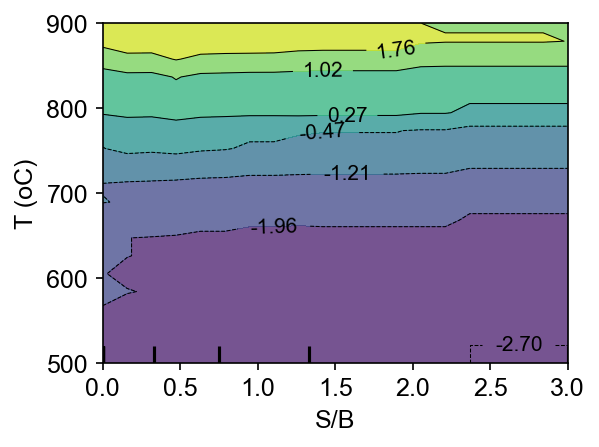

In [41]:
"""feature correlation plot"""

from sklearn.inspection import PartialDependenceDisplay
names=data.columns.values[:9]
print(names)
features=[('S/B','T (oC)')]#,['C (%)' 'H (%)' 'N (%)' 'S (%)' 'O (%)' 'Ash (%)' 'S/B' 'ER' 'T (oC)']
import matplotlib as mpl
from cycler import cycler
mpl.rcParams.update({'font.size': 12, 'font.family': 'Arial', 'mathtext.fontset': 'stix',"figure.dpi":150 })
mpl.rcParams['axes.prop_cycle'] = cycler(color=[ 'g', 'b', 'y','r'])
mpl.rc('lines', linewidth=1.5)#, linestyle='-.'

_, ax = plt.subplots(ncols=1, figsize=(4,3))
display = PartialDependenceDisplay.from_estimator(
    regr_rf,
    X_train,
    features,
    feature_names=names,
    kind="average",
    n_jobs=3,
    grid_resolution=20,
    ax=ax
)
#display.figure_.subplots_adjust(wspace=0.4, hspace=0.1)
# plt.xticks(fontsize=20,weight='normal')
# plt.yticks(fontsize=20,weight='normal')
#plt.grid(True)
plt.show()